<a href="https://colab.research.google.com/github/vansika1310/CODSOFT/blob/main/Task5_Codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 5: Credit Card Fraud Detection**

Batch: Feb P36

Domain: Data Science

Aim: Credit card fraud detection using machine learning

*Import required libraries*

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
rcParams['figure.figsize']=14, 8
sns.set(style = 'whitegrid',palette = 'muted', font_scale= 1.5)
import warnings
warnings.filterwarnings('ignore')

*Import the dataset*

In [2]:
from google.colab import drive


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df= pd.read_csv('/content/sample_data/creditcard.csv')

*Exploring Data*

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df.shape

(17505, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17505 entries, 0 to 17504
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17505 non-null  int64  
 1   V1      17505 non-null  float64
 2   V2      17505 non-null  float64
 3   V3      17505 non-null  float64
 4   V4      17505 non-null  float64
 5   V5      17505 non-null  float64
 6   V6      17505 non-null  float64
 7   V7      17505 non-null  float64
 8   V8      17505 non-null  float64
 9   V9      17505 non-null  float64
 10  V10     17505 non-null  float64
 11  V11     17505 non-null  float64
 12  V12     17505 non-null  float64
 13  V13     17505 non-null  float64
 14  V14     17505 non-null  float64
 15  V15     17505 non-null  float64
 16  V16     17505 non-null  float64
 17  V17     17505 non-null  float64
 18  V18     17505 non-null  float64
 19  V19     17505 non-null  float64
 20  V20     17504 non-null  float64
 21  V21     17504 non-null  float64
 22

In [9]:
df.isnull().values.any()

True

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,17505.000000,17505.000000,17505.000000,17505.000000,17505.000000,17505.000000,17505.000000,17505.000000,17505.000000,17505.000000,...,17504.000000,17504.000000,17504.000000,17504.000000,17504.000000,17504.000000,17504.000000,17504.000000,17504.000000,17504.000000
mean,13551.932248,-0.252908,0.266305,0.777677,0.297187,-0.139561,0.101768,-0.149161,0.013150,0.756787,...,-0.055874,-0.153917,-0.037503,0.013845,0.119058,0.036679,0.014897,0.006677,67.139506,0.004628
std,9708.562338,1.902725,1.513770,1.775533,1.483059,1.429499,1.331392,1.348793,1.325779,1.273589,...,0.832151,0.629170,0.530078,0.587970,0.439118,0.539053,0.396986,0.249744,188.644288,0.067870
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.687773,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3764.000000,-0.964711,-0.297041,0.338816,-0.626582,-0.722373,-0.651489,-0.597054,-0.176683,-0.074848,...,-0.263849,-0.559341,-0.172920,-0.332065,-0.141366,-0.346882,-0.072038,-0.012243,5.400000,0.000000
50%,11905.000000,-0.312138,0.242082,0.922017,0.234986,-0.188225,-0.168952,-0.074964,0.019469,0.755407,...,-0.121184,-0.122747,-0.045502,0.062983,0.156878,-0.027753,0.002342,0.018242,15.950000,0.000000
75%,23049.000000,1.162544,0.882482,1.558261,1.163006,0.350886,0.497045,0.448635,0.273304,1.495627,...,0.037570,0.244326,0.073590,0.397211,0.396657,0.346363,0.099529,0.077038,56.167500,0.000000
max,28777.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


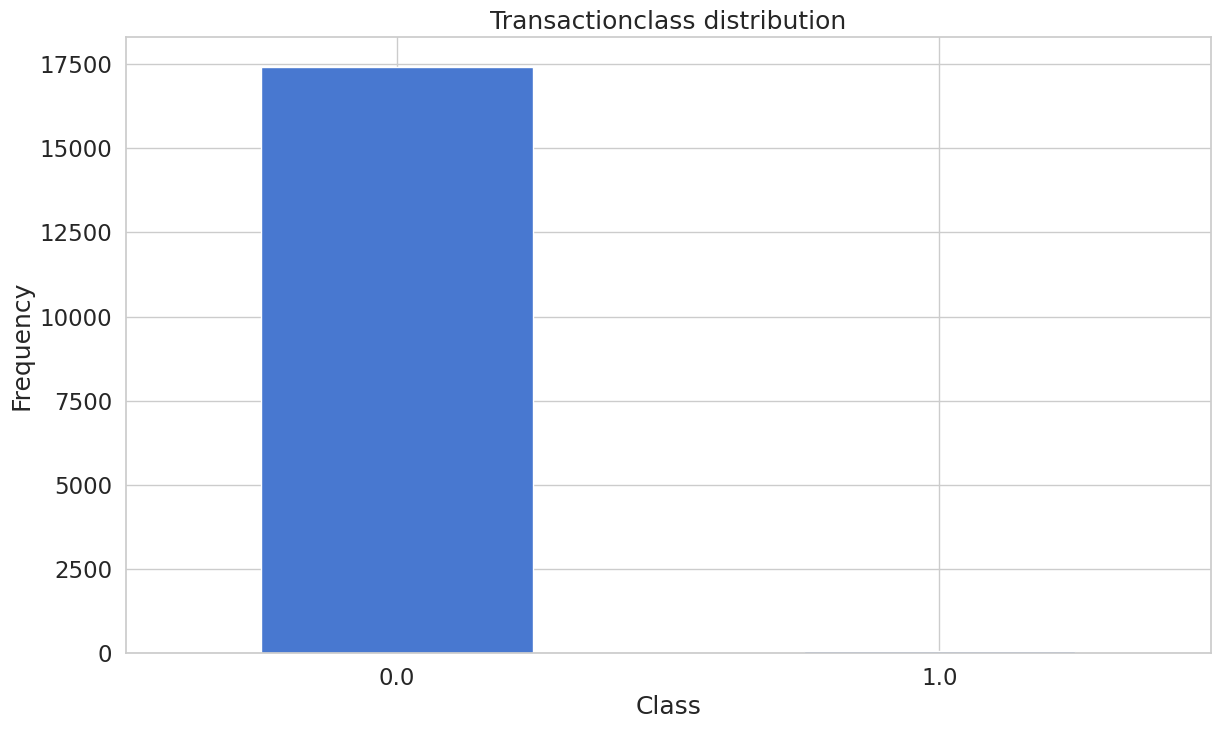

In [11]:
count_classes=pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind='bar',rot= 0)
plt.title('Transactionclass distribution')
plt.xlabel("Class")
plt.ylabel("Frequency");

*Imbalance in data*

In [12]:
#Determine number of fraud cases in dataset
fraudulent=df[df.Class == 1]
genuine=df[df.Class == 0]


In [13]:
#Printing counts
fraudulent.shape

(81, 31)

In [14]:
#Printing counts
genuine.shape

(17423, 31)

In [16]:
#Details of the fraudulent transaction
fraudulent.Amount.describe()

count      81.000000
mean       98.105926
std       267.464067
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [15]:
#Details of the genuine transaction
genuine.Amount.describe()

count    17423.000000
mean        66.995542
std        188.199763
min          0.000000
25%          5.490000
50%         15.950000
75%         56.000000
max       7712.430000
Name: Amount, dtype: float64

*Preprocessing*

In [17]:
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
data=df.drop(['Amount'],axis= 1)

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.437240
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.341655
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.651412
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.298775
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.015111


In [19]:
data=df.drop(['Time'],axis = 1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.437240
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,-0.341655
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,1.651412
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.298775
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.015111


In [20]:
X=df.iloc[:,df.columns != 'Class']
y=df.iloc[:,df.columns == 'Class']

In [21]:
y.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [22]:
X= df.drop('Class',axis = 1).values
y= df['Class'].values

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state= 0)

In [25]:
X_train.shape

(12253, 31)

In [24]:
X_test.shape

(5252, 31)

*Building Model*

In [33]:
model=LogisticRegression()



In [34]:
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
X_train_prediction= model.predict(X_train)

In [36]:
training_data_accuracy= accuracy_score(X_train_prediction,y_train)

In [37]:
print('Accuracy on training data:',training_data_accuracy)


Accuracy on training data: 0.9980412960091406
